<a href="https://colab.research.google.com/github/SCARLXRD-1/Challenge_Alura-_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [165]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



 Primer análisis,calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

 Paso 1: Crear mi lista de tiendas

In [168]:

tiendas = [tienda, tienda2, tienda3, tienda4]


Paso 2 :Calculo los totales de precios por tienda

In [151]:
ingresos_por_tienda = [tienda['Precio'].sum() for tienda in tiendas]


Paso 3: Mostrar los resultados

In [152]:
for i, ingreso in enumerate(ingresos_por_tienda, start=1):
    print(f"Ingreso total Tienda {i}: {ingreso}")

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


Gráficas de los precios por tienda

Importo la librería

In [155]:
import matplotlib.pyplot as plt


Paso 2: Creo etiquetas para las tiendas
Como son 4 tiendas, usaré una lista de nombres:

In [156]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

 Paso 3: Crear el gráfico

<ipython-input-157-10c8746644e0>:14: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


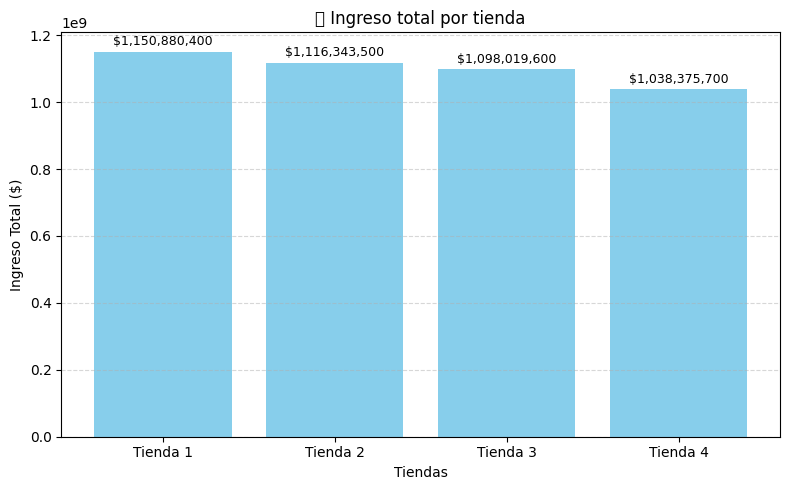

In [157]:
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos_por_tienda, color='skyblue')

plt.title('💰 Ingreso total por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Esta partesera para que se visualicen mis valores encima de cada barra
for i, valor in enumerate(ingresos_por_tienda):
    plt.text(i, valor + 20000000, f"${valor:,.0f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Mi lista


In [169]:
tiendas = [tienda, tienda2, tienda3, tienda4]

Paso 1: Agrupare por categoría y contar las ventas
Voy a  usar el método `groupby()` de pandas para agrupar los productos por Categoría del Producto y luego contar la cantidad de ventas de cada categoría con el método `size().`

In [170]:
ventas_por_categoria = [tienda.groupby('Categoría del Producto').size() for tienda in tiendas]

Paso 2: Mostrare las ventas por categoría



In [171]:
for i, ventas in enumerate(ventas_por_categoria, start=1):
    print(f"\n📦 Tienda {i} - Ventas por categoría:")
    print(ventas.reset_index(name='Ventas'))


📦 Tienda 1 - Ventas por categoría:
    Categoría del Producto  Ventas
0  Artículos para el hogar     171
1     Deportes y diversión     284
2        Electrodomésticos     312
3             Electrónicos     448
4   Instrumentos musicales     182
5                 Juguetes     324
6                   Libros     173
7                  Muebles     465

📦 Tienda 2 - Ventas por categoría:
    Categoría del Producto  Ventas
0  Artículos para el hogar     181
1     Deportes y diversión     275
2        Electrodomésticos     305
3             Electrónicos     422
4   Instrumentos musicales     224
5                 Juguetes     313
6                   Libros     197
7                  Muebles     442

📦 Tienda 3 - Ventas por categoría:
    Categoría del Producto  Ventas
0  Artículos para el hogar     177
1     Deportes y diversión     277
2        Electrodomésticos     278
3             Electrónicos     451
4   Instrumentos musicales     177
5                 Juguetes     315
6                

 Paso 3: Mostrar los resultados en Gráfico por tienda

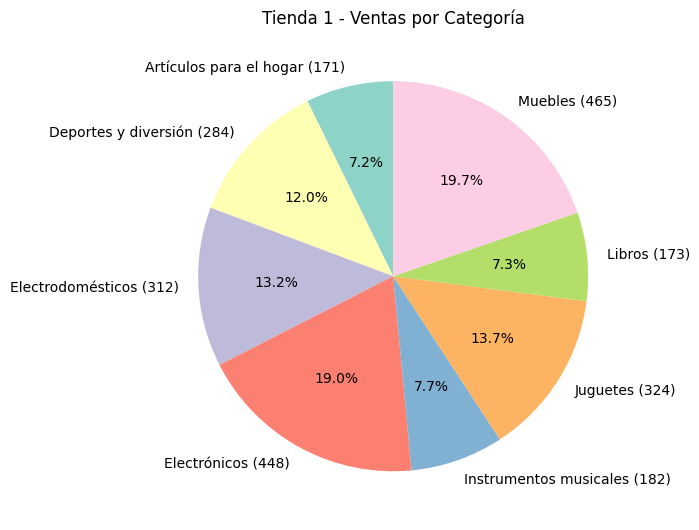

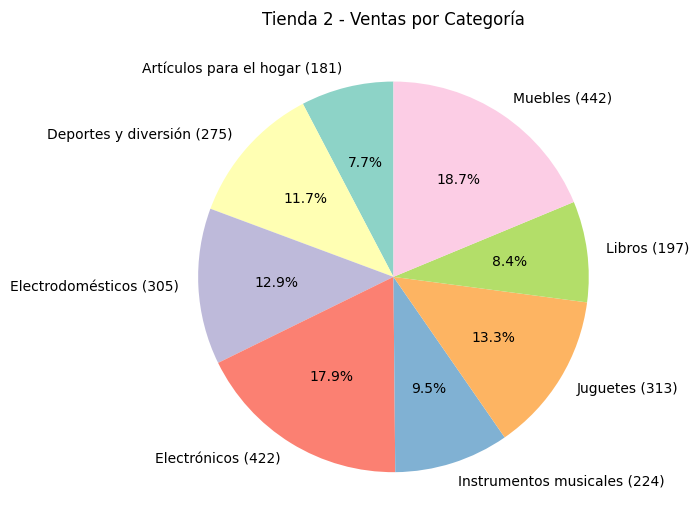

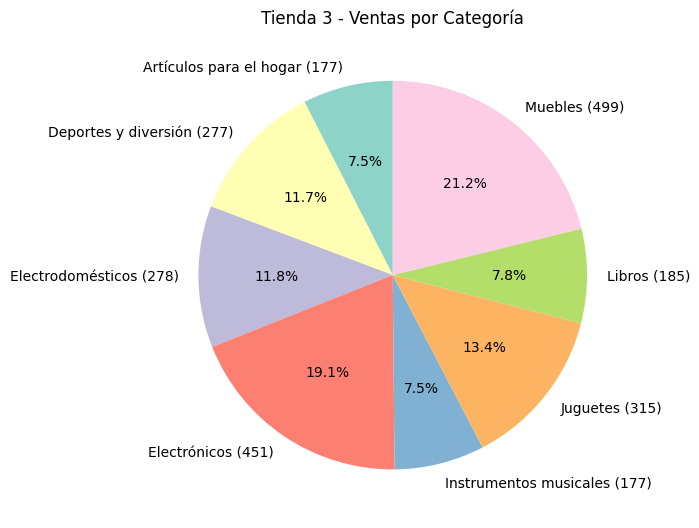

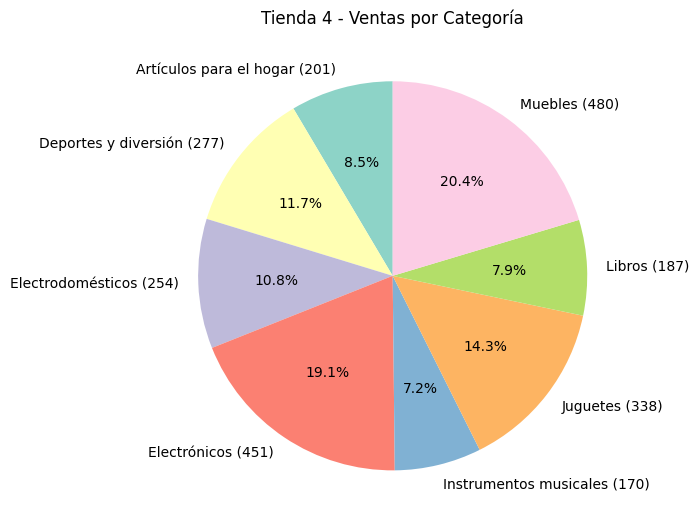

In [184]:
for i, ventas in enumerate(ventas_por_categoria, start=1):
    plt.figure(figsize=(7, 7))
    plt.pie(
        ventas,
        labels=[f'{categoria} ({cantidad})' for categoria, cantidad in ventas.items()],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors
    )
    plt.title(f'Tienda {i} - Ventas por Categoría')
    plt.tight_layout()
    plt.show()

¿Por qué aparece? `Name: count, dtype: int64`

Se debe cuando uso:

In [148]:
tienda['Categoría del Producto'].value_counts()

,count
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


Esto  me  devuelve una Serie de Pandas que tiene:

El índice: las categorías (como "Electrónicos", "Juguetes", etc.).

El valor: la cantidad de veces que aparece cada categoría.

El nombre de la Serie: por defecto puede ser count.

El tipo de dato: int64.

Pero si solo quiero que me diga la categorías y sus cantidades lo puedo hacer de esta manera a como lo vi se nos enseño en los cursos:

In [147]:
for i, categorias in enumerate(ventas_por_categoria, start=1):
    print(f"\n Tienda {i} - Ventas por categoría:")
    print(categorias.to_dict())


 Tienda 1 - Ventas por categoría:
{'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}

 Tienda 2 - Ventas por categoría:
{'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}

 Tienda 3 - Ventas por categoría:
{'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Instrumentos musicales': 177, 'Artículos para el hogar': 177}

 Tienda 4 - Ventas por categoría:
{'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}


Esto lo muestra sin el "Name" ni el "dtype"

# 3. Calificación promedio de la tienda


Paso 1: Usamos nuestra lista con los DataFrames de las tiendas

In [84]:
tiendas = [tienda, tienda2, tienda3, tienda4]

Paso 2: Calcular la calificación promedio por tienda

In [85]:
calificacion_promedio = [round(sum(tienda['Calificación']) / len(tienda['Calificación']), 2) for tienda in tiendas]


Paso 3: Mostrar los resultados

In [86]:
for i, promedio in enumerate(calificacion_promedio, start=1):
    print(f"Tienda {i} - Calificación promedio: {promedio}")

Tienda 1 - Calificación promedio: 4.0
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.0


# 4. Productos más y menos vendidos

Paso 1: Contar ventas por producto
Usare`.value_counts()` sobre la columna "Producto" igual que hice con  categoría:

In [101]:
ventas_por_producto = [tienda['Producto'].value_counts() for tienda in tiendas]

Paso 2: Mostrare el producto más y menos vendido por tienda
Usando `.idxmax()` y `.idxmin()` para obtener el nombre del producto, y `.max() / .min() ` para ver también la cantidad.

In [105]:
for i, tienda in enumerate(tiendas, start=1):
    conteo_productos = tienda['Producto'].value_counts()

    mas_vendido = conteo_productos.idxmax()
    menos_vendido = conteo_productos.idxmin()

    print(f"\n🏬 Tienda {i}:")
    print(f"🔝 Más vendido: {mas_vendido} ({conteo_productos.max()} ventas)")
    print(f"🔻 Menos vendido: {menos_vendido} ({conteo_productos.min()} venta{'s' if conteo_productos.min() > 1 else ''})")


🏬 Tienda 1:
🔝 Más vendido: Cama box (62 ventas)
🔻 Menos vendido: Guitarra eléctrica (33 ventas)

🏬 Tienda 2:
🔝 Más vendido: Iniciando en programación (65 ventas)
🔻 Menos vendido: Juego de mesa (32 ventas)

🏬 Tienda 3:
🔝 Más vendido: Kit de bancas (57 ventas)
🔻 Menos vendido: Bloques de construcción (35 ventas)

🏬 Tienda 4:
🔝 Más vendido: Cama box (62 ventas)
🔻 Menos vendido: Guitarra eléctrica (33 ventas)


# 5. Envío promedio por tienda

Paso 1: Usamos nuestra lista con los DataFrames de las tiendas

In [106]:
tiendas = [tienda, tienda2, tienda3, tienda4]

2. Cálculo con comprensión de listas

In [107]:
envio_promedio = [round(tienda['Costo de envío'].mean(), 2) for tienda in tiendas]

3. Mostrar los resultados

In [108]:
for i, prom in enumerate(envio_promedio, start=1):
    print(f"Tienda {i} - Envío promedio: {prom}")

Tienda 1 - Envío promedio: 23459.46
Tienda 2 - Envío promedio: 25216.24
Tienda 3 - Envío promedio: 24805.68
Tienda 4 - Envío promedio: 23459.46
